In [1]:
import pandas as pd

df = pd.read_csv('C://Users//and_c//Desktop//sparta_ga4//train_df.csv', low_memory = False)

In [2]:
# 해당 값 전체 보기
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)
pd.options.display.max_columns = None

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 903653 entries, 0 to 903652
Data columns (total 55 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   channelGrouping                                    903653 non-null  object 
 1   date                                               903653 non-null  int64  
 2   fullVisitorId                                      903653 non-null  object 
 3   sessionId                                          903653 non-null  object 
 4   socialEngagementType                               903653 non-null  object 
 5   visitId                                            903653 non-null  int64  
 6   visitNumber                                        903653 non-null  int64  
 7   visitStartTime                                     903653 non-null  int64  
 8   device_browser                                     903653 non-null  object

In [4]:
df.fillna(0, inplace = True)

In [5]:
df.head(3)

,channelGrouping,date,fullVisitorId,sessionId,socialEngagementType,visitId,visitNumber,visitStartTime,device_browser,device_browserVersion,device_browserSize,device_operatingSystem,device_operatingSystemVersion,device_isMobile,device_mobileDeviceBranding,device_mobileDeviceModel,device_mobileInputSelector,device_mobileDeviceInfo,device_mobileDeviceMarketingName,device_flashVersion,device_language,device_screenColors,device_screenResolution,device_deviceCategory,geoNetwork_continent,geoNetwork_subContinent,geoNetwork_country,geoNetwork_region,geoNetwork_metro,geoNetwork_city,geoNetwork_cityId,geoNetwork_networkDomain,geoNetwork_latitude,geoNetwork_longitude,geoNetwork_networkLocation,totals_visits,totals_hits,totals_pageviews,totals_bounces,totals_newVisits,totals_transactionRevenue,trafficSource_campaign,trafficSource_source,trafficSource_medium,trafficSource_keyword,trafficSource_adwordsClickInfo.criteriaParameters,trafficSource_isTrueDirect,trafficSource_referralPath,trafficSource_adwordsClickInfo.page,trafficSource_adwordsClickInfo.slot,trafficSource_adwordsClickInfo.gclId,trafficSource_adwordsClickInfo.adNetworkType,trafficSource_adwordsClickInfo.isVideoAd,trafficSource_adContent,trafficSource_campaignCode
0,Organic Search,20160902,1131660440785968503,1131660440785968503_1472830385,Not Socially Engaged,1472830385,1,1472830385,Chrome,not available in demo dataset,not available in demo dataset,Windows,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop,Asia,Western Asia,Turkey,Izmir,(not set),Izmir,not available in demo dataset,ttnet.com.tr,not available in demo dataset,not available in demo dataset,not available in demo dataset,1,1,1.0,1.0,1.0,0.0,(not set),google,organic,(not provided),not available in demo dataset,0,0,0.0,0,0,0,0,0,0
1,Organic Search,20160902,377306020877927890,377306020877927890_1472880147,Not Socially Engaged,1472880147,1,1472880147,Firefox,not available in demo dataset,not available in demo dataset,Macintosh,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop,Oceania,Australasia,Australia,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,dodo.net.au,not available in demo dataset,not available in demo dataset,not available in demo dataset,1,1,1.0,1.0,1.0,0.0,(not set),google,organic,(not provided),not available in demo dataset,0,0,0.0,0,0,0,0,0,0
2,Organic Search,20160902,3895546263509774583,3895546263509774583_1472865386,Not Socially Engaged,1472865386,1,1472865386,Chrome,not available in demo dataset,not available in demo dataset,Windows,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop,Europe,Southern Europe,Spain,Community of Madrid,(not set),Madrid,not available in demo dataset,unknown.unknown,not available in demo dataset,not available in demo dataset,not available in demo dataset,1,1,1.0,1.0,1.0,0.0,(not set),google,organic,(not provided),not available in demo dataset,0,0,0.0,0,0,0,0,0,0


In [ ]:
# df_pro = pd.read_csv('./preproccessed_df.csv', low_memory=False)
# df_pro.info()
# df_pro.head()
# df utf 값 변환관련 해결을 아직 못해서 pass..

기간은 16-8-2 ~ 17-1-5 까지

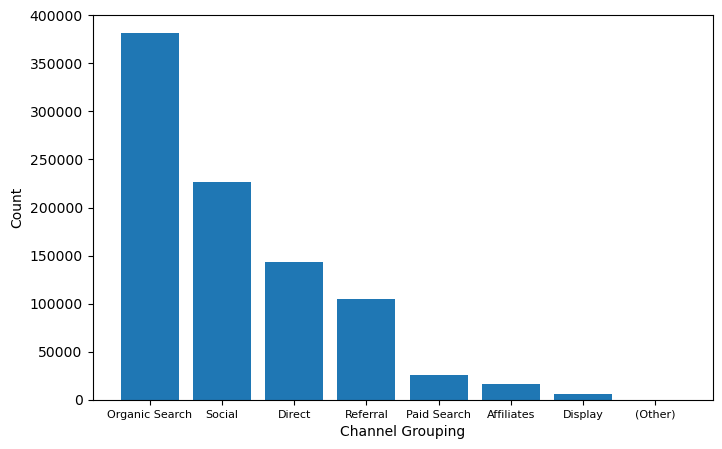

In [7]:
# 채널 그룹별
num_channel = df.groupby('channelGrouping')[['fullVisitorId']].count()
num_channel = num_channel.sort_values(by = 'fullVisitorId', ascending = False )
import matplotlib.pyplot as plt

plt.figure(figsize = (8,5))
plt.bar(num_channel.index, num_channel['fullVisitorId'])
plt.xlabel('Channel Grouping')
plt.ylabel('Count')
plt.xticks(fontsize=8)
plt.show()

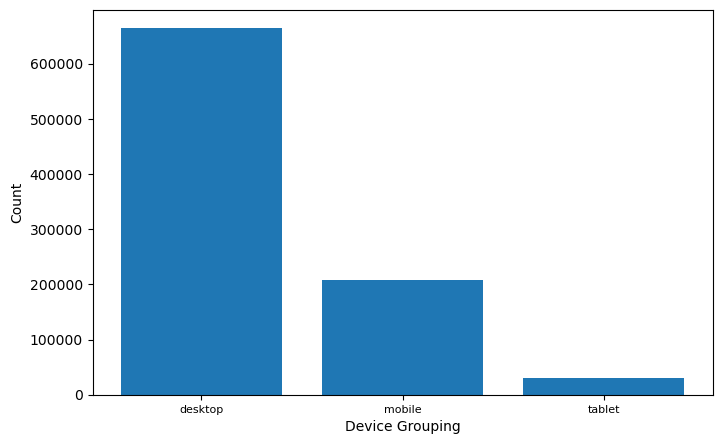

In [8]:
device_count = df.groupby('device_deviceCategory')[['fullVisitorId']].count()
device_count = device_count.sort_values(by = 'fullVisitorId', ascending = False )
plt.figure(figsize = (8,5))
plt.bar(device_count.index, device_count['fullVisitorId'])
plt.xlabel('Device Grouping')
plt.ylabel('Count')
plt.xticks(fontsize=8)
plt.show()

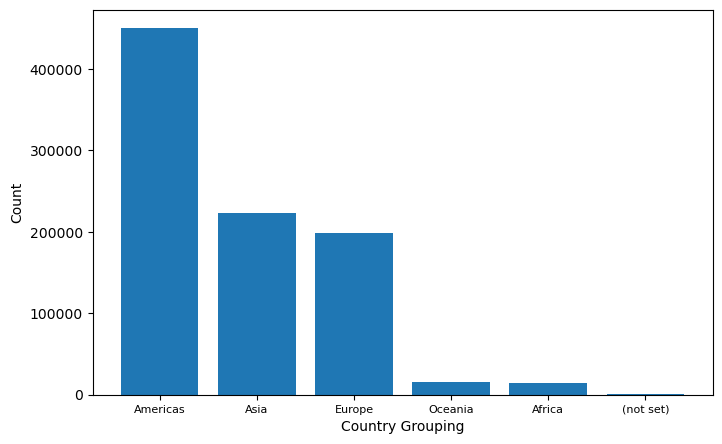

In [9]:
# 국가별
country_count = df.groupby('geoNetwork_continent')[['fullVisitorId']].count()
country_count = country_count.sort_values(by = 'fullVisitorId', ascending = False )

plt.figure(figsize = (8,5))
plt.bar(country_count.index, country_count['fullVisitorId'])
plt.xlabel('Country Grouping')
plt.ylabel('Count')
plt.xticks(fontsize=8)
plt.show()

In [6]:

# revenue 여부를 나타내는 칼럼 추가
df['revenue_check'] = df['totals_transactionRevenue'].copy()
df['revenue_check'].fillna(0, inplace= True)
df['revenue_check'] = df['revenue_check'].where(df['revenue_check'] == 0, 1)

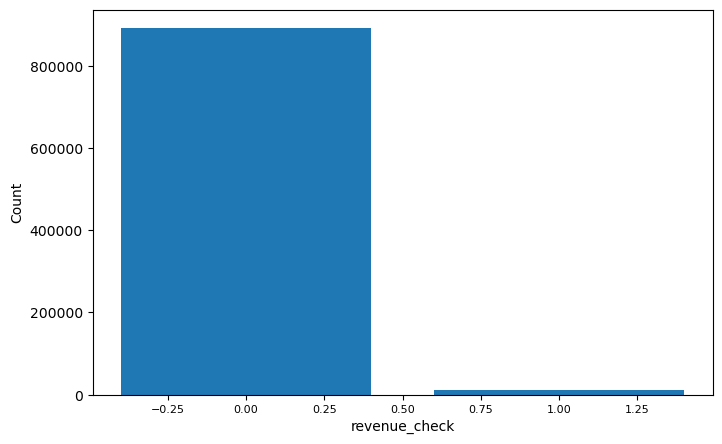

In [8]:
# revenue 여부 시각화
import matplotlib.pyplot as plt
revenue_check_df = df.groupby('revenue_check')[['fullVisitorId']].count()

plt.figure(figsize = (8,5))
plt.bar(revenue_check_df.index, revenue_check_df['fullVisitorId'])
plt.xlabel('revenue_check')
plt.ylabel('Count')
plt.xticks(fontsize=8)
plt.show()

In [21]:
num_df = df.groupby('fullVisitorId')[['revenue_check']].sum()

In [24]:
num_df1 = pd.DataFrame({'fullVisitorId': num_df.index.repeat(num_df.shape[1]), 'count': num_df.values.flatten()})
num_df1 = num_df1.sort_values(by = 'count', ascending = False )

In [25]:
num_df1.head()

,fullVisitorId,count
557953,7813149961404844386,33.0
139589,1957458976293878100,16.0
355406,4984366501121503466,16.0
171253,2402527199731150932,15.0
482512,6760732402251466726,15.0


시간관련

In [17]:
# 고객의 접속률
ct_id = df.groupby('fullVisitorId')[['sessionId']].count()

In [18]:
ct_id_df = pd.DataFrame({'fullVisitorId': ct_id.index.repeat(ct_id.shape[1]), 'count': ct_id.values.flatten()})
ct_id_df = ct_id_df.sort_values(by = 'count', ascending = False )

In [20]:
ct_id_df.head()

,fullVisitorId,count
139589,1957458976293878100,278
58716,0824839726118485274,255
257343,3608475193341679870,201
132193,1856749147915772585,199
233127,3269834865385146569,155


In [26]:
# 조인
merge_ct_df = pd.merge(num_df1,ct_id_df, how='inner',on='fullVisitorId')

In [27]:
merge_ct_df.head(6)

,fullVisitorId,count_x,count_y
0,7813149961404844386,33.0,86
1,1957458976293878100,16.0,278
2,4984366501121503466,16.0,24
3,2402527199731150932,15.0,31
4,6760732402251466726,15.0,40
5,0608915197735218105,13.0,17


<AxesSubplot:xlabel='count_x', ylabel='count_y'>

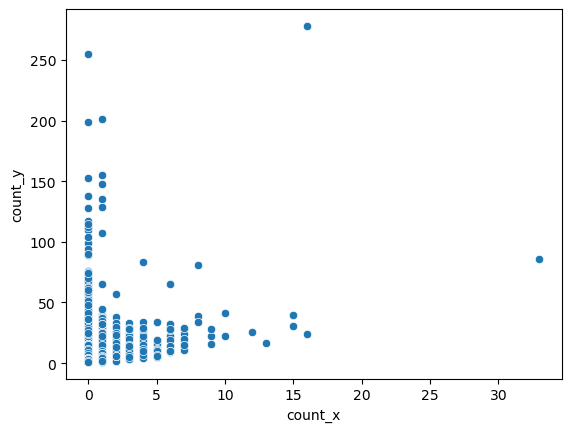

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns  
sns.scatterplot(data = merge_ct_df, x = 'count_x', y = 'count_y')


In [29]:
# 고객 유형 파악

In [ ]:
# 데이터프레임에 한 열의 값을 바꾸기 위해서 def함수를 만들고 apply 적용
import pandas as pd
import datetime #날짜와 시간을 다루는 라이브러리
import pytz #다양한 시간대를 처리하기 위해 사용하는 라이브러리

# Posix 시간을 utc 시간으로 변환하는 함수
def posix_to_utc(visitStartTime):
    utc_time = datetime.datetime.utcfromtimestamp(visitStartTime)
    return utc_time

# Posix 시간을 UTC 지정한 로컬 시간대로 변환하는 함수
def posix_to_utc_local(visitStartTime):
    utc_time = datetime.datetime.utcfromtimestamp(visitStartTime) #posix -> utc시간대로
    local_timezone = pytz.timezone('America/New_York')  # 지역 시간대
    return utc_time.astimezone(local_timezone) # 그 지역 시간대로 변환

In [ ]:
df['visitStartTime'] = df['visitStartTime'].apply(posix_to_utc)

In [ ]:
# DAU구하기
df.groupby(df['visitStartTime'].dt.date)[['fullVisitorId']].nunique()

In [ ]:
# WAU구하기
df.groupby(df['visitStartTime'].dt.date)[['fullVisitorId']].nunique()

리텐션 구하기
- 클랳식
- 롤러
- 범위

In [ ]:
a = 3
b = 4